<a href="https://colab.research.google.com/github/yeonjunky/learn_ml/blob/main/3_LogisticRegression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

In [13]:
cali = datasets.fetch_california_housing()
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<br>
<br>

#### 1-1. (미국 보스턴의 주택 가격) 데이터 읽어들이기 & Binary label 만들어주기

In [10]:
df_data = cali.data
df_data = pd.DataFrame(df_data, columns = cali.feature_names)
df_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df_target = cali.target
df_target = pd.DataFrame(df_target)
df_target.head()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
# 집값의 평균값이 얼마일까요?

mean_price = df_target[0].mean()
mean_price

2.068558169089147

In [17]:
df_target['Label'] = df_target[0].apply(lambda x: 1 if x > mean_price else 0 ) # 새로운 함수를 '적용'해주려면?
df_target.head()

,0,Label
0,4.526,1
1,3.585,1
2,3.521,1
3,3.413,1
4,3.422,1


<br>
<br>

#### 1-2. Dataframe 을 Numpy array (배열, 행렬)로 바꿔주기

In [18]:
cali_data = np.array(df_data)
cali_target = np.array(df_target['Label'])

In [19]:
cali_target

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
cali_X = cali_data[:, (0, 2)]
cali_X

array([[8.3252    , 6.98412698],
       [8.3014    , 6.23813708],
       [7.2574    , 8.28813559],
       ...,
       [1.7       , 5.20554273],
       [1.8672    , 5.32951289],
       [2.3886    , 5.25471698]])

In [21]:
cali_Y = cali_target

<br>
<br>

#### 2. Feature 선택하기

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

In [ ]:
# Use only one feature 

boston_X = boston_data[:,(5, 12)] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_X

array([[ 15.3 ,   4.98],
       [ 17.8 ,   9.14],
       [ 17.8 ,   4.03],
       ..., 
       [ 21.  ,   5.64],
       [ 21.  ,   6.48],
       [ 21.  ,   7.88]])

In [ ]:
boston_Y = boston_target

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [22]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(cali_X, 
                                                                    cali_Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0, 
                                                                    stratify=cali_Y)

In [24]:
print(cali_X.shape, cali_Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20640, 2) (20640,)
(14448, 2)
(6192, 2)
(14448,)
(6192,)


<br>
<br>

#### 4. 비어있는 모델 객체 만들기

In [26]:
model = linear_model.LogisticRegression() # 로지스틱회귀

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [27]:
# Train the model using the training sets

model.fit(x_train, y_train)

LogisticRegression()

<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [28]:
# 양성/음성 확률을 확인하려면?

# plot roc curve for test set
pred_test = model.predict_proba(x_test) # Predict 'probability'
pred_test

array([[0.90059598, 0.09940402],
       [0.27533886, 0.72466114],
       [0.65086229, 0.34913771],
       ...,
       [0.00415919, 0.99584081],
       [0.35347348, 0.64652652],
       [0.84805203, 0.15194797]])

In [29]:
from sklearn.metrics import accuracy_score # accuracy

# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

Accuracy:  0.7684108527131783


<br>
<br>

#### 7. 모델 시각화

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

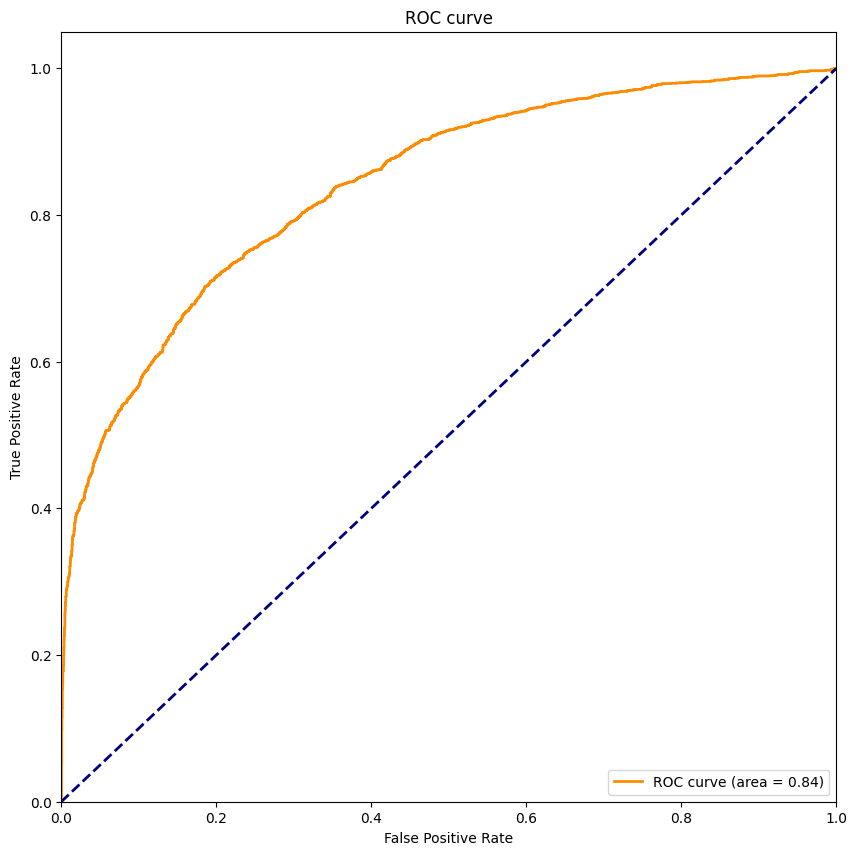

In [31]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요!

Accuracy:  0.8223684210526315


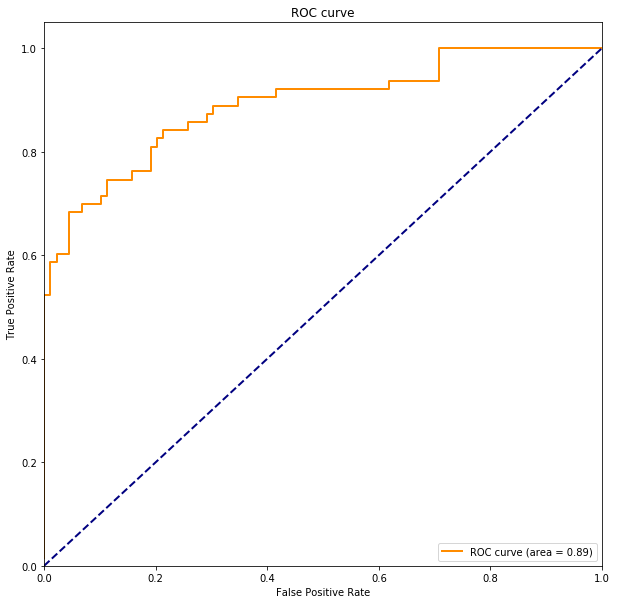

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc

# 1. Prepare the data (array!)
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_target = pd.read_excel('boston_house_target.xlsx')
df_target['Label'] = df_target[0].apply(lambda x: 1 if x > df_target[0].mean() else 0 ) 
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

# 2. Feature selection
boston_X = boston_data[:,(5, 12)] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_Y = boston_target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = linear_model.LogisticRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

# 7. Visualize the model
pred_test = model.predict_proba(x_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [ ]:
# 513 